In [1]:
%run databaseTesting.ipynb

In [114]:
from typing import List, Dict
import timeit
import matplotlib.pyplot as plt
import numpy as np

class DatabaseTester:
    def __init__(self, databaseList: List[DatabaseTestingInterface]):
        self.databaseList = databaseList
        self.executionTimeTable: List[List[Dict[int, float]]] = [[], [], [], []]
        for methodIndex in range(4):
            for _ in databaseList:
                self.executionTimeTable[methodIndex].append({})

    def testCreate(self, createdRecords: int = 1, recordsPerTransaction: int = 1):
        for databaseIndex, database in enumerate(self.databaseList):
            def prepeareCreate():
                database.reset()
            total_time = 0
            for currentRecord in range(0, createdRecords, recordsPerTransaction):
                print(f"inserting {currentRecord} of {createdRecords}")
                total_time += timeit.timeit(lambda: database.create(min(recordsPerTransaction, createdRecords - recordsPerTransaction)), lambda: prepeareCreate(), number=10)
            self.executionTimeTable[0][databaseIndex][recordsPerTransaction] = total_time

    def testRead(self, readRecords: int = 1, recordsPerTransaction: int = 1):
        for databaseIndex, database in enumerate(self.databaseList):
            database.reset()
            database.create(readRecords)
            total_time = 0
            for currentRecord in range(0, readRecords, recordsPerTransaction):
                print(f"reading {currentRecord} of {readRecords}")
                total_time += timeit.timeit(lambda: database.read(min(recordsPerTransaction, readRecords - recordsPerTransaction)), number=10)
            self.executionTimeTable[1][databaseIndex][recordsPerTransaction] = total_time

    def testUpdate(self, updatedRecords: int = 1, recordsPerTransaction: int = 1):
        for databaseIndex, database in enumerate(self.databaseList):
            def prepeareUpdate():
                database.reset()
                database.create(recordsPerTransaction)
            total_time = 0
            for currentRecord in range(0, updatedRecords, recordsPerTransaction):
                print(f"updating {currentRecord} of {updatedRecords}")
                total_time += timeit.timeit(lambda: database.update(min(recordsPerTransaction, updatedRecords - recordsPerTransaction)), lambda: prepeareUpdate(), number=10)
            self.executionTimeTable[2][databaseIndex][recordsPerTransaction] = total_time

    def tesetDelete(self, deletedRecords: int = 1, recordsPerTransaction: int = 1):
        for databaseIndex, database in enumerate(self.databaseList):
            def prepeareDelete():
                database.reset()
                database.create(recordsPerTransaction)
            total_time = 0
            for currentRecord in range(0, deletedRecords, recordsPerTransaction):
                print(f"deleting {currentRecord} of {deletedRecords}")
                total_time += timeit.timeit(lambda: database.delete(min(recordsPerTransaction, deletedRecords - recordsPerTransaction)), lambda: prepeareDelete(), number=10)
            self.executionTimeTable[3][databaseIndex][recordsPerTransaction] = total_time

    def drawGraphs(self):
        methodName = ['creating', 'reading', 'updating', 'deleting']
        for methodIndex, method in enumerate(self.executionTimeTable):
            labels = [database.getName() for database in self.databaseList]
            names = [x.__str__() for x in method[0].keys().__reversed__()]
            bar_width = 0.2
            bar_shift = bar_width

            x = np.arange(len(method[0].keys()))

            for i, database in enumerate(method):
                y = list(database.values().__reversed__())

                shift = ((-1*len(method)/2)*bar_width + bar_shift*i)

                plt.bar([xi + shift for xi in x], y, width=bar_width, label=labels[i])

            plt.xticks(x, names)
            plt.title(f'Time elapsed while {methodName[methodIndex]} a 1000 records.')
            plt.xlabel('Number of records per transaction')
            plt.ylabel('Elapsed Time (seconds)')
            plt.legend()
            plt.show()

    def setExecutionTimeTable(self, executionTimeTable):
        self.executionTimeTable = executionTimeTable

    def getExecutionTimeTable(self):
        return self.executionTimeTable

In [112]:
csvFiles = get_csv_file_paths("./csvData")
databaseTester = DatabaseTester([
    SqliteDatabaseTesting("sqliteDatabase.db", csvFiles),
    PostgresDatabaseTesting("user=postgres password=PASSWORD host=localhost port=5432 dbname=postgres", csvFiles)
    #CassandraDatabaseTesting("localhost", csvFiles),
    #MongoDatabaseTesting("mongodb://localhost:27017", csvFiles)
])

In [105]:
databaseTester.testCreate(1000, 500)
databaseTester.testCreate(1000, 200)
databaseTester.testCreate(1000, 100)

inserting 0 of 1000
inserting 500 of 1000
inserting 0 of 1000


KeyboardInterrupt: 

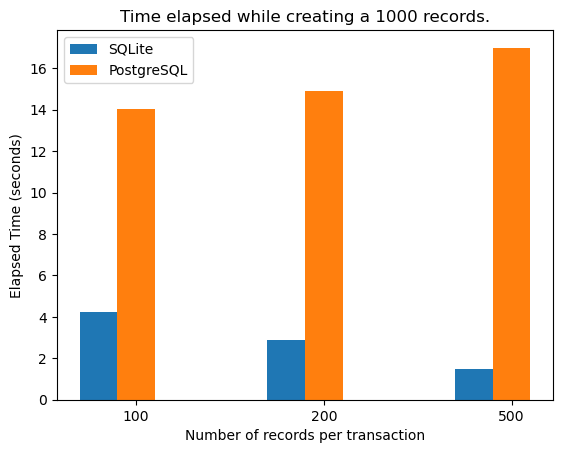

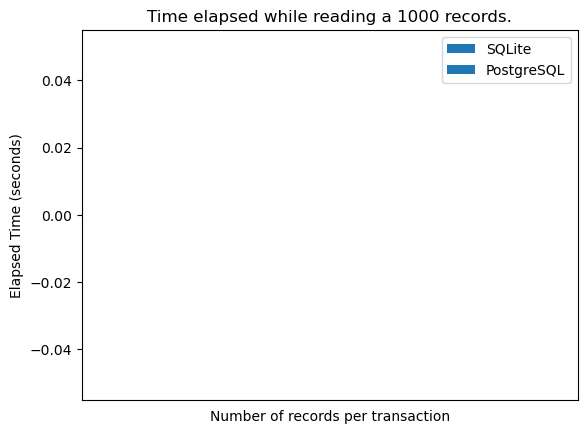

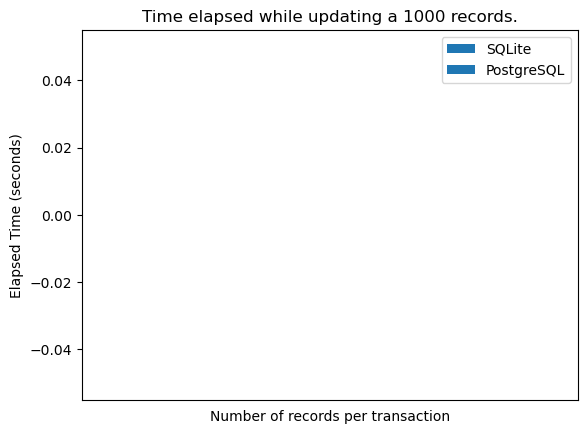

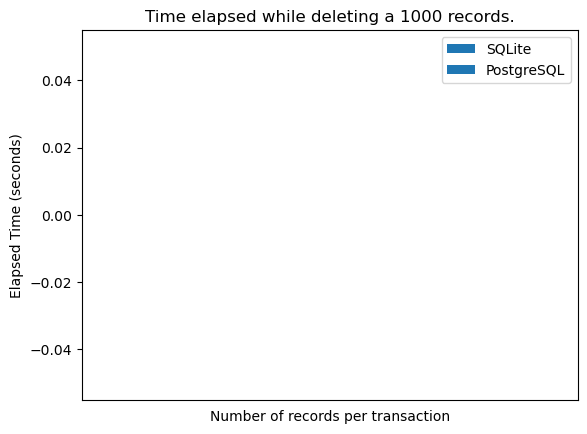

In [113]:
databaseTester.setExecutionTimeTable(x)
databaseTester.drawGraphs()

In [72]:
x = databaseTester.getExecutionTimeTable()

In [86]:
print(x)

[[{500: 1.5024852719998307, 200: 2.8599886339980003, 100: 4.256477163999989}, {500: 16.99458313499963, 200: 14.888071098000182, 100: 14.035670653000125}], [{}, {}], [{}, {}], [{}, {}]]


In [106]:
databaseTester.setExecutionTimeTable(x)

In [67]:
y = [[{500: 1.5478549720005503, 200: 2.899309579999681, 100: 4.584432954998647}], [{}], [{}], [{}]]

In [68]:
print(y)

[[{500: 1.5478549720005503, 200: 2.899309579999681, 100: 4.584432954998647}], [{}], [{}], [{}]]
